# **Libraries**

In [ ]:
import pandas as pd
import numpy as np

# **Data Loading**

In [ ]:
try:
  df = pd.read_csv("/content/final.csv")
except FileNotFoundError:
  # Mount Google Drive
  from google.colab import drive
  drive.mount('/content/drive')
  df = pd.read_csv("/content/drive/MyDrive/THIRD_SEMESTER/Spatial Modeling/Project/final.csv")

# **Initial Inspection**

In [ ]:
# Shape of the dataset
print(df.shape)

(5116, 8)


In [ ]:
df.head()

,From Date,To Date,PM2.5,PM10,WS,WD,Temp,RH
0,01-07-2017 00:00,02-07-2017 00:00,22.91,64.39,2.67,124.86,32.57,66.4
1,02-07-2017 00:00,03-07-2017 00:00,23.66,65.8,2.59,119.97,32.39,66.35
2,03-07-2017 00:00,04-07-2017 00:00,28.11,82.23,2.43,112.52,32.3,66.6
3,04-07-2017 00:00,05-07-2017 00:00,26.64,87.08,2.77,102.78,32.42,63.92
4,05-07-2017 00:00,06-07-2017 00:00,23.6,64.3,2.4,107.27,32.69,67.46


In [ ]:
df.tail()

,From Date,To Date,PM2.5,PM10,WS,WD,Temp,RH
5111,26-06-2024 00:00,27-06-2024 00:00,16.7,50.86,31.45,68.28,0.65,192.29
5112,27-06-2024 00:00,28-06-2024 00:00,15.33,55.67,29.71,68.84,0.9,188.84
5113,28-06-2024 00:00,29-06-2024 00:00,18.61,58.42,29.26,73.21,0.73,168.85
5114,29-06-2024 00:00,30-06-2024 00:00,20,52.93,27.96,77.96,0.78,145.91
5115,30-06-2024 00:00,01-07-2024 00:00,14.77,31.76,27.77,82.48,0.75,125.64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5116 entries, 0 to 5115
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   From Date  5116 non-null   object
 1   To Date    5116 non-null   object
 2   PM2.5      4990 non-null   object
 3   PM10       4986 non-null   object
 4   WS         4985 non-null   object
 5   WD         4992 non-null   object
 6   Temp       4985 non-null   object
 7   RH         4991 non-null   object
dtypes: object(8)
memory usage: 319.9+ KB


# **Basic Pre-processing**

In [ ]:
df.drop(columns=['To Date'], inplace=True)

In [ ]:
df.rename(columns={'From Date':'Timestamp'}, inplace=True)

# **Putting NaN in place of missing values**

In [ ]:
# Loop through the pollutant columns
for col in ['PM2.5',	'PM10',	'WS',	'WD',	'Temp',	'RH']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Converts non-numeric values to NaN

# Check for missing values
df.isnull().sum()

,0
PM2.5,0
PM10,0
WS,0
WD,0
Temp,0
RH,0


# **Timestamp to index**

In [ ]:
# Fill missing time with '00:00'
df['Timestamp'] = df['Timestamp'].apply(lambda x: x if len(x) > 10 else x + ' 00:00')

# Convert timestamp to datetime with specific format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M', errors='coerce', dayfirst=True)

# Extract only the date part and keep it in the 'Timestamp' column
df['Timestamp'] = df['Timestamp'].dt.date

# Set the new 'Timestamp' column as the index
df = df.set_index('Timestamp')

In [ ]:
df.head()

,PM2.5,PM10,WS,WD,Temp,RH
Timestamp,,,,,,
2017-07-01,22.91,64.39,2.67,124.86,32.57,66.40
2017-07-02,23.66,65.80,2.59,119.97,32.39,66.35
2017-07-03,28.11,82.23,2.43,112.52,32.30,66.60
2017-07-04,26.64,87.08,2.77,102.78,32.42,63.92
2017-07-05,23.60,64.30,2.40,107.27,32.69,67.46


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5116 entries, 2017-07-01 to 2024-06-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   4988 non-null   float64
 1   PM10    4984 non-null   float64
 2   WS      4983 non-null   float64
 3   WD      4990 non-null   float64
 4   Temp    4983 non-null   float64
 5   RH      4990 non-null   float64
dtypes: float64(6)
memory usage: 279.8+ KB


# **Timeseries Graph**

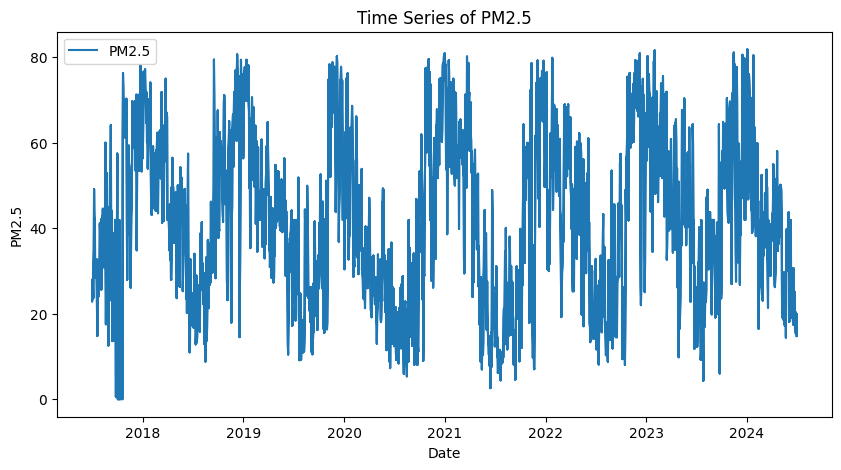

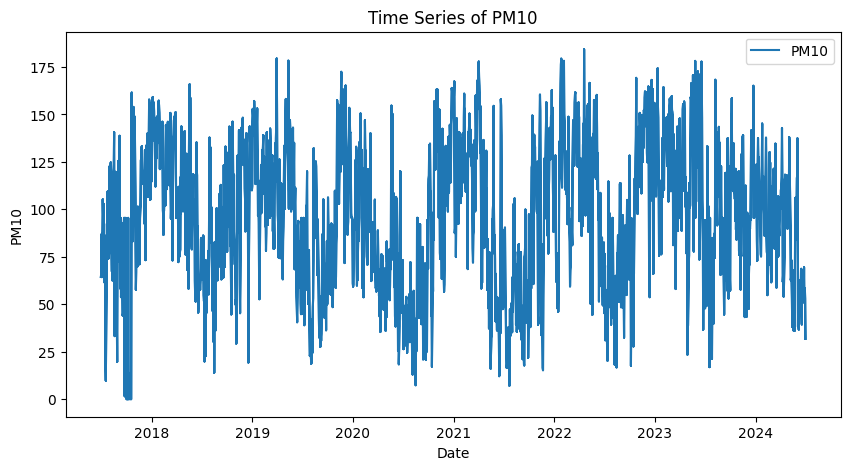

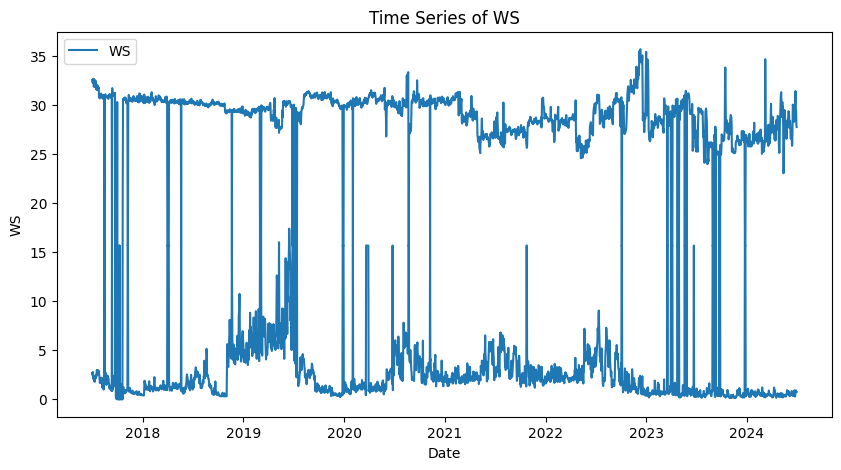

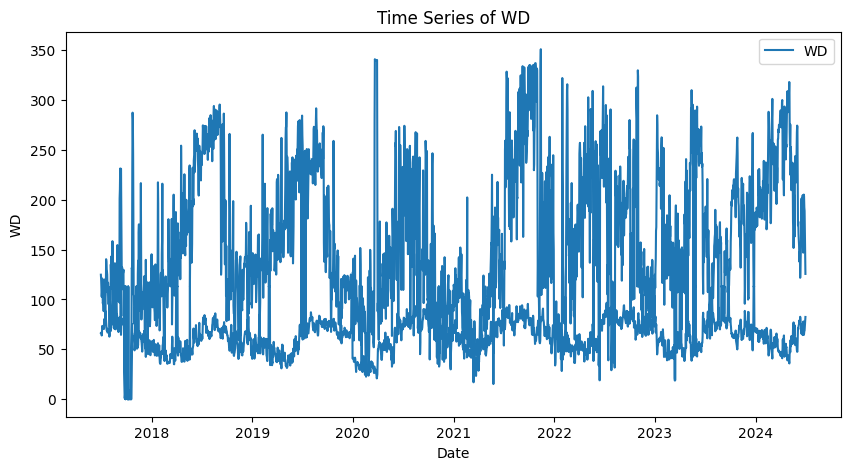

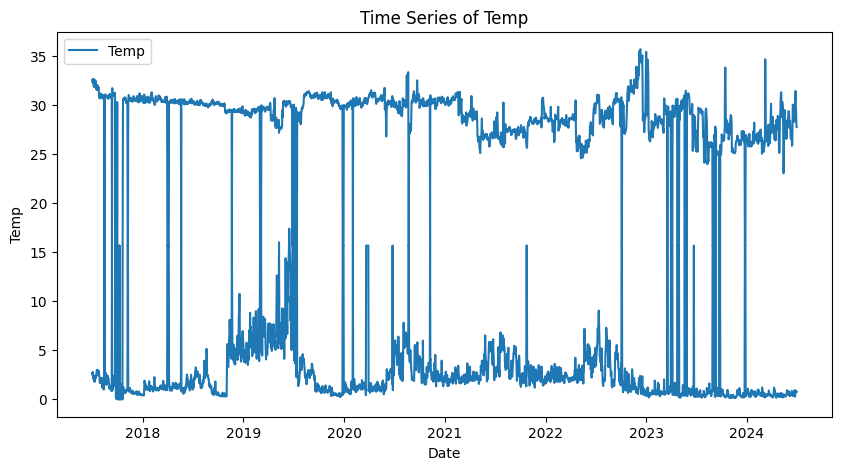

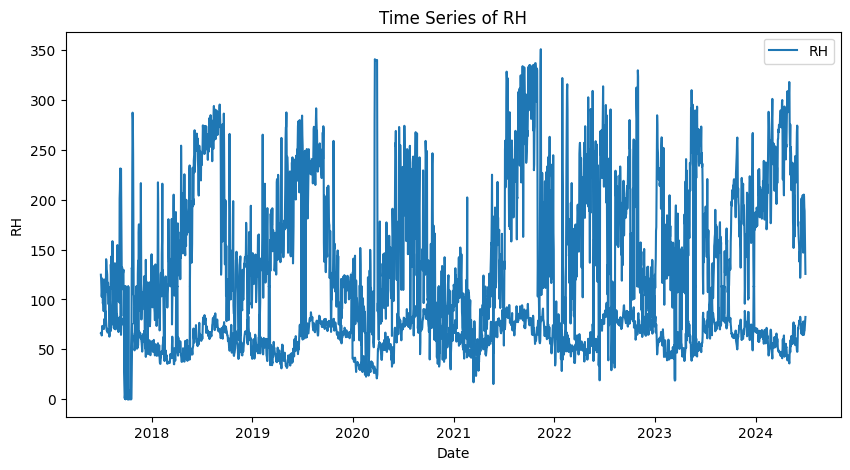

In [ ]:
import matplotlib.pyplot as plt

def plot_all_columns_timeseries(df):
    # Ensure the index is in datetime64 format for plotting
    df.index = pd.to_datetime(df.index)

    # Loop through each column in the DataFrame
    for column in df.columns:
        # Plot the time series for each column
        plt.figure(figsize=(10, 5))
        plt.plot(df.index, df[column], label=column)
        plt.title(f'Time Series of {column}')
        plt.xlabel('Date')
        plt.ylabel(column)
        plt.legend()
        #plt.grid(True)
        plt.show()

# df = your DataFrame with 'Timestamp' as the index
plot_all_columns_timeseries(df)

# **Descriptive Statistics**

             PM2.5         PM10           WS           WD         Temp  \
count  4988.000000  4984.000000  4983.000000  4990.000000  4983.000000   
mean     41.917739    95.525084    15.676801   113.047990    15.676801   
std      19.482142    37.963977    13.615495    73.003288    13.615495   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      26.070000    65.605000     1.680000    60.600000     1.680000   
50%      41.015000    97.495000    13.980000    80.465000    13.980000   
75%      58.160000   125.747500    29.680000   152.827500    29.680000   
max      81.830000   184.330000    35.710000   350.950000    35.710000   

                RH  
count  4990.000000  
mean    113.047990  
std      73.003288  
min       0.000000  
25%      60.600000  
50%      80.465000  
75%     152.827500  
max     350.950000  
-------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5116 entries, 2017-07-01 to 2024-06

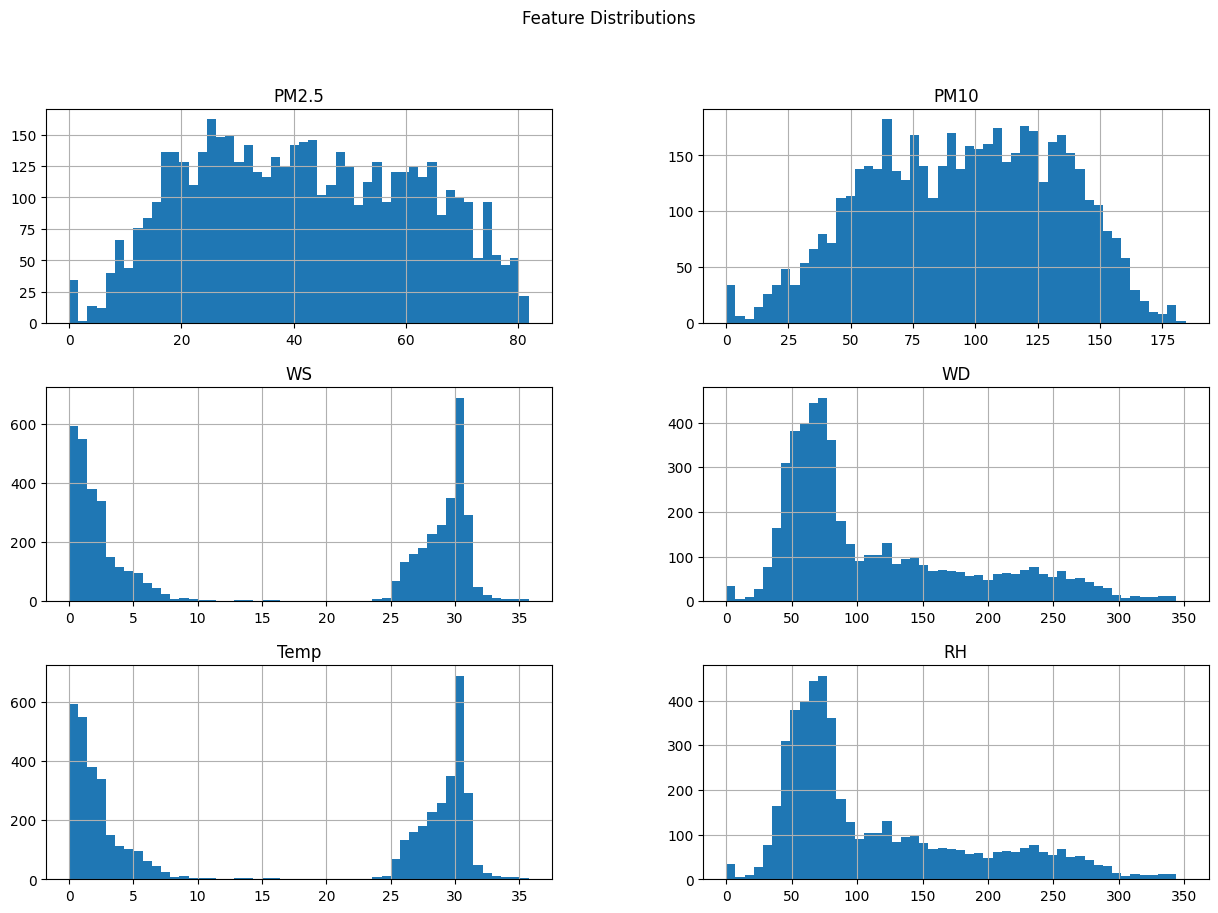

-------------------------------------------------------


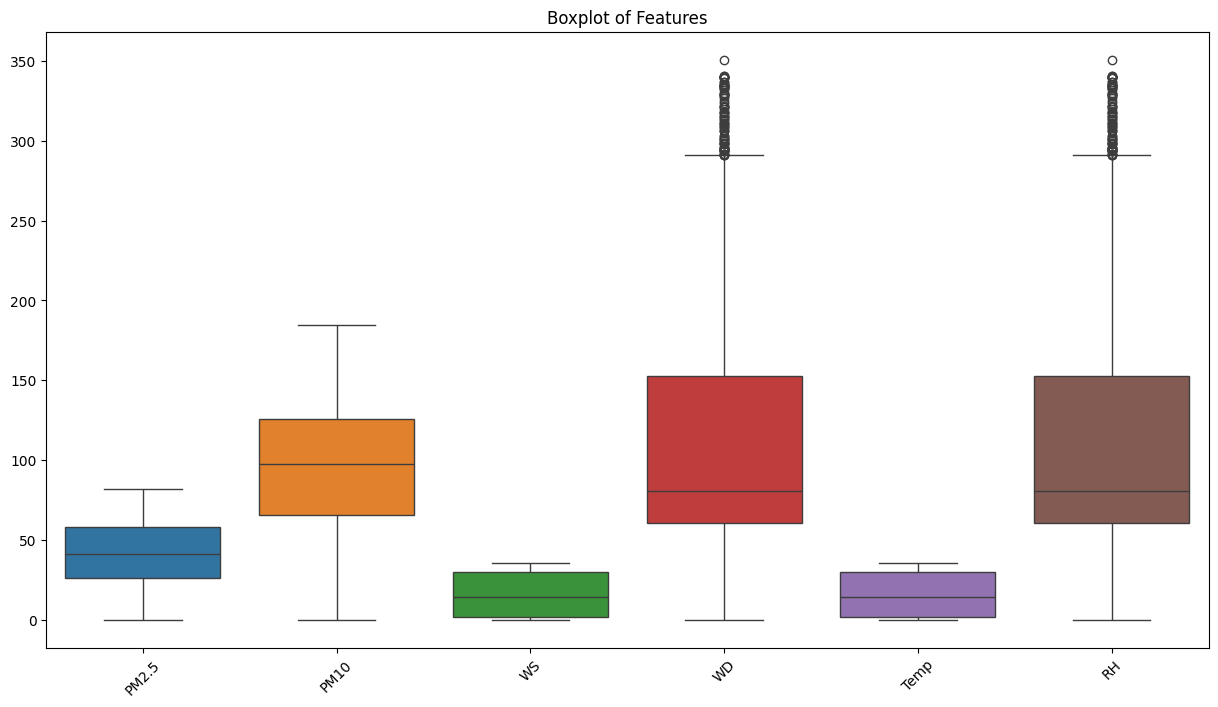

In [ ]:
# Summary statistics for all features
print(df.describe())
print('-------------------------------------------------------')

# Check data types and missing values
print(df.info())
print('-------------------------------------------------------')

# Count of missing values per column
print("Missing Values:\n", df.isnull().sum())
print('-------------------------------------------------------')

# Plotting histograms to check data distribution
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()
print('-------------------------------------------------------')

# Boxplots to check for outliers
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()

# **Correlation Analysis**

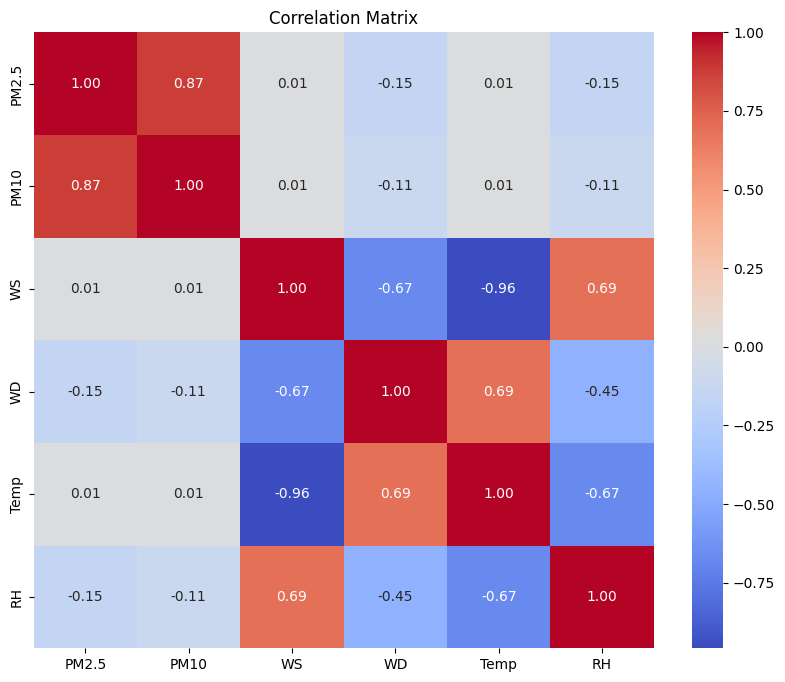

Correlation of features with PM2.5:
 PM2.5    1.000000
PM10     0.872552
WS       0.007809
Temp     0.007809
RH      -0.154389
WD      -0.154389
Name: PM2.5, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df.corr()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Correlation of PM2.5 with other variables
pm25_corr = correlation_matrix['PM2.5'].sort_values(ascending=False)
print("Correlation of features with PM2.5:\n", pm25_corr)

# **Seasonal Analysis**

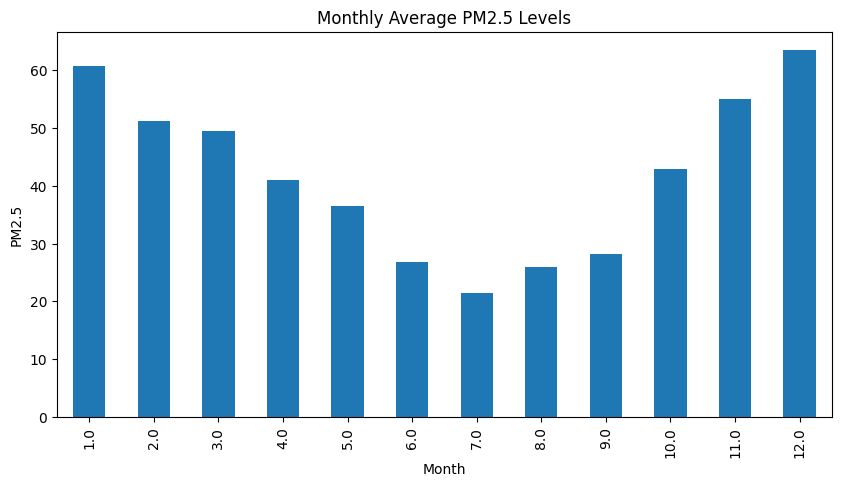

In [ ]:
# Resample data to monthly, daily, or weekly means
df['month'] = df.index.month

# Monthly average PM2.5
monthly_avg = df.groupby('month')['PM2.5'].mean()

plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar')
plt.title("Monthly Average PM2.5 Levels")
plt.xlabel("Month")
plt.ylabel("PM2.5")
plt.show()

# **Visualization**

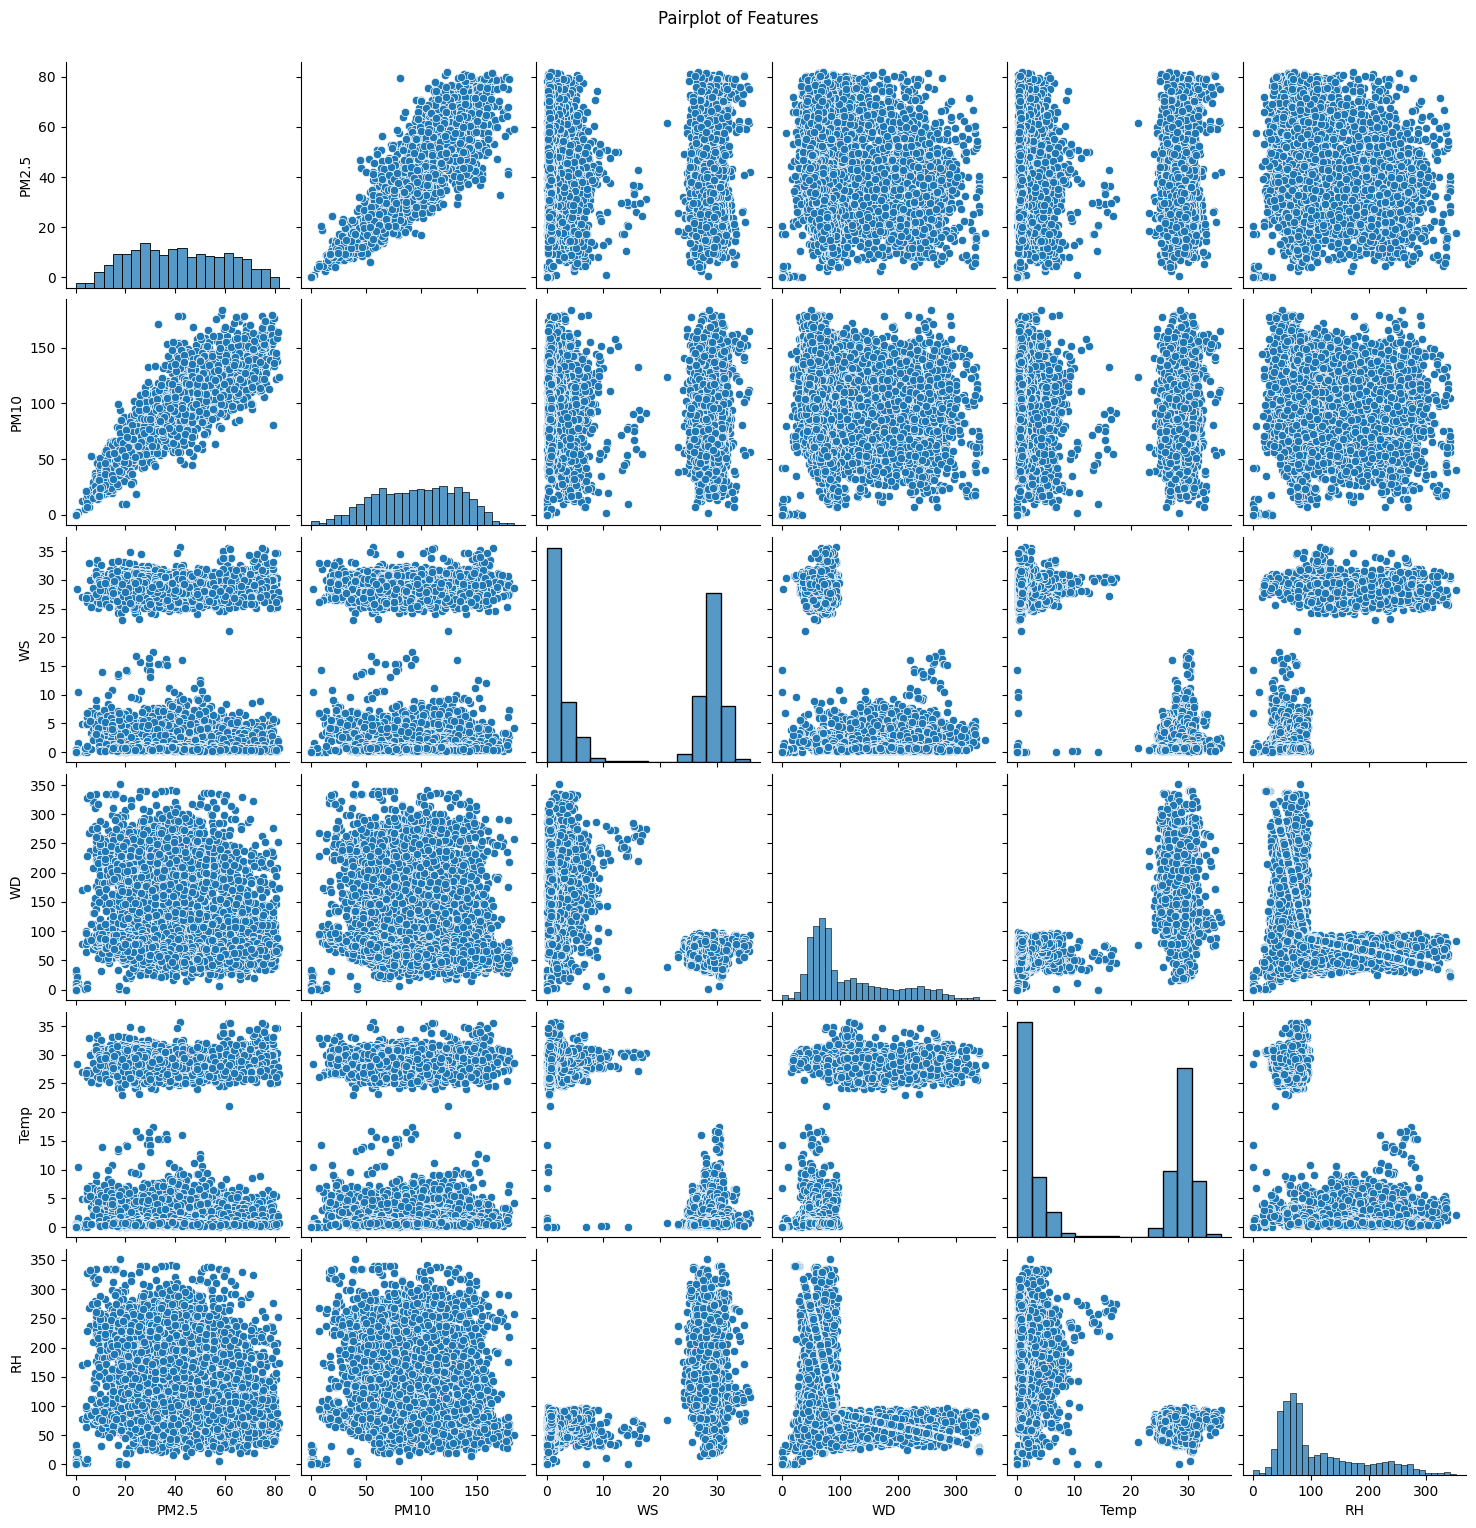

In [ ]:
# Reset the index of the DataFrame before plotting
df = df.reset_index()

# Generate the pairplot
sns.pairplot(df[['PM2.5',	'PM10',	'WS',	'WD',	'Temp',	'RH']])
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

# **Normalization and other preprocessing**

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Normalize the dataset
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Convert to DataFrame for easier manipulation
scaled_df = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)

# Define the target variable and features
target_col = 'PM2.5'
features = list(df.columns)

# Function to create sequences for LSTM
def create_sequences(data, target, seq_length=30):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, :])
        y.append(data[i, target])
    return np.array(X), np.array(y)

# Split the dataset into training, validation, and testing sets
train_size = int(len(scaled_df) * 0.7)
val_size = int(len(scaled_df) * 0.15)

train_data = scaled_df.iloc[:train_size].values
val_data = scaled_df.iloc[train_size:train_size+val_size].values
test_data = scaled_df.iloc[train_size+val_size:].values

# Create sequences
seq_length = 30  # Use 30 days as sequence length
X_train, y_train = create_sequences(train_data, features.index(target_col), seq_length)
X_val, y_val = create_sequences(val_data, features.index(target_col), seq_length)
X_test, y_test = create_sequences(test_data, features.index(target_col), seq_length)

# **LSTM model building**

In [ ]:
# Define the LSTM model
model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, activation='tanh', return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Predicting a single value (PM2.5)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Display the model architecture
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 30, 64)              │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,137 (121.63 KB)

 Trainable params: 31,137 (121.63 KB)

 Non-trainable params: 0 (0.00 B)

# **Model Training**

In [ ]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0535 - mae: 0.1816 - val_loss: 0.0279 - val_mae: 0.1322
Epoch 2/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0275 - mae: 0.1299 - val_loss: 0.0237 - val_mae: 0.1216
Epoch 3/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0247 - mae: 0.1234 - val_loss: 0.0219 - val_mae: 0.1182
Epoch 4/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0241 - mae: 0.1216 - val_loss: 0.0196 - val_mae: 0.1108
Epoch 5/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0211 - mae: 0.1128 - val_loss: 0.0198 - val_mae: 0.1123
Epoch 6/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0185 - mae: 0.1060 - val_loss: 0.0188 - val_mae: 0.1099
Epoch 7/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0180 - mae: 0.1050 - val_loss: 0.0142 - val_mae: 0.0944
Epoch 8/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0159 - mae: 0.0982 - val_loss: 0.0141 - val_mae: 0.0957
Epoch 9/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step -

# **Training Vs Validation Graphs**

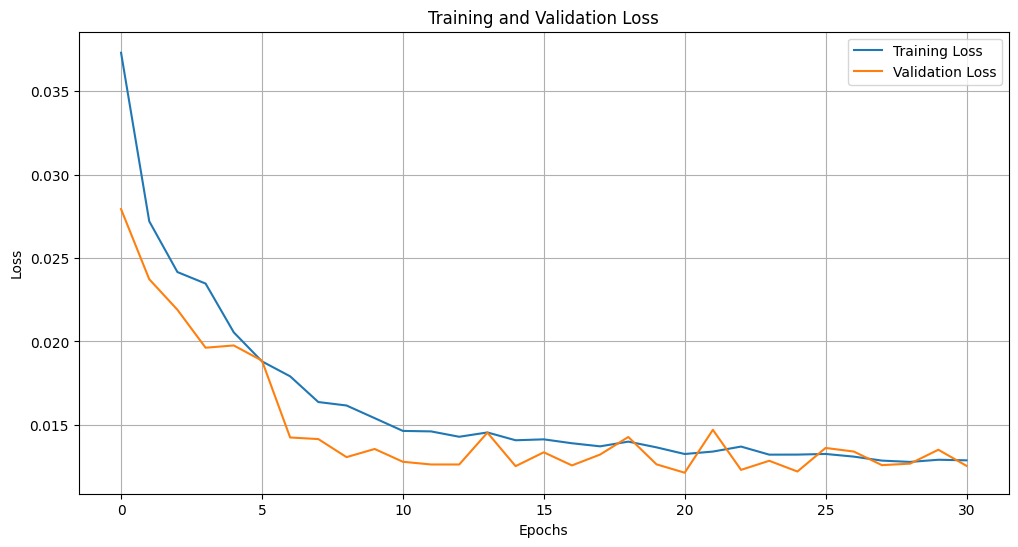

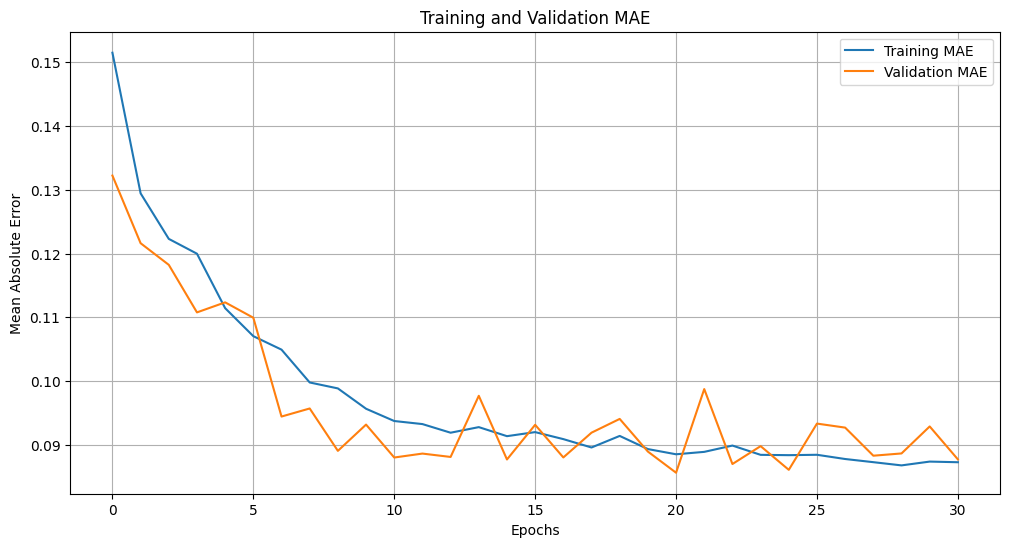

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot training and validation MAE
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid()
plt.show()


# **Overlay Chart**

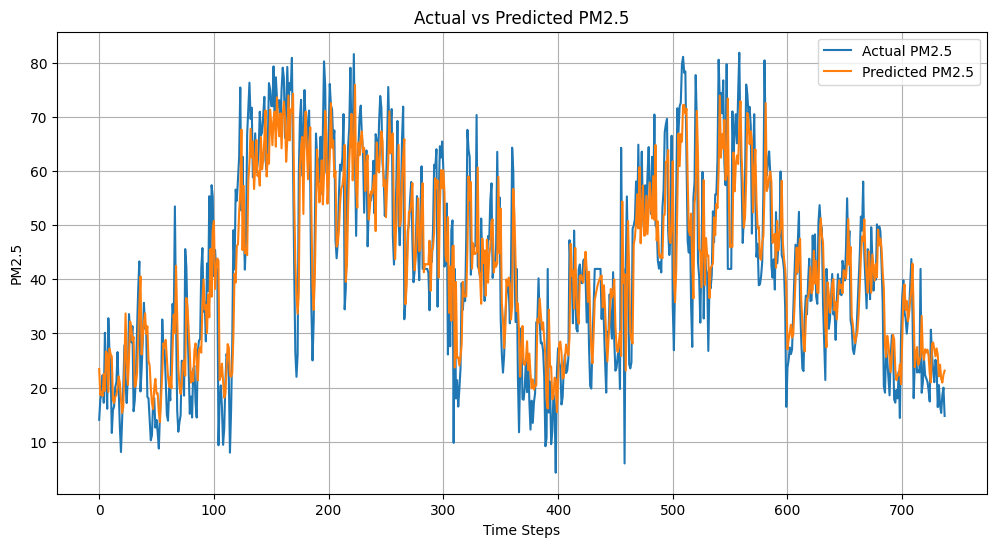

In [ ]:
# Create a placeholder array with the correct number of features
y_test_reshaped = np.zeros((y_test.shape[0], 6))
y_pred_reshaped = np.zeros((y_pred.shape[0], 6))

feature_index = 0
y_test_reshaped[:, feature_index] = y_test
y_pred_reshaped[:, feature_index] = y_pred.ravel()

# Now apply inverse_transform to the reshaped arrays
y_test_rescaled = scaler.inverse_transform(y_test_reshaped)
y_pred_rescaled = scaler.inverse_transform(y_pred_reshaped)

# Extract the PM2.5 values (or the relevant feature) for plotting
y_test_rescaled = y_test_rescaled[:, feature_index]
y_pred_rescaled = y_pred_rescaled[:, feature_index]

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual PM2.5')
plt.plot(y_pred_rescaled, label='Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.xlabel('Time Steps')
plt.ylabel('PM2.5')
plt.legend()
plt.grid()
plt.show()

# **Model Evaluation and Performance Metrics Calculation**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Create placeholder arrays with the correct number of features
y_test_reshaped = np.zeros((y_test.shape[0], 6))  # Assuming 6 features
y_pred_reshaped = np.zeros((y_pred.shape[0], 6))  # Assuming 6 features

feature_index = 0  # Change this if PM2.5 was scaled at a different feature index
y_test_reshaped[:, feature_index] = y_test
y_pred_reshaped[:, feature_index] = y_pred.ravel()  # Flatten y_pred if necessary

# Now apply inverse_transform to the reshaped arrays
y_test_rescaled = scaler.inverse_transform(y_test_reshaped)
y_pred_rescaled = scaler.inverse_transform(y_pred_reshaped)

# Extract the PM2.5 values (or the relevant feature) for calculating metrics
y_test_rescaled = y_test_rescaled[:, feature_index]
y_pred_rescaled = y_pred_rescaled[:, feature_index]

# Compute Metrics
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mape = np.mean(np.abs((y_test_rescaled - y_pred_rescaled) / y_test_rescaled)) * 100
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

# Print results
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")
print(f"R²: {r2}")

RMSE: 9.578549325011052
MAE: 7.350555513770451
MAPE: 23.373874128760207%
R²: 0.7292924709475337
